# Retail Analysis with Walmart Data

#### Import library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
#import pandas_profiling 
import seaborn as sns


from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Read csv

In [2]:
df_stores = pd.read_csv('C:\\rohit\\simple\\Data Science with Python\\practice project5\\Walmart_Store_sales.csv')

#### Print first five columns

In [3]:
df_stores.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### Check null values and data types

In [4]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


###### No null values are present

In [5]:
df_stores.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


#### Which store has maximum sales

In [6]:
df_sales = df_stores.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

In [7]:
df_sales.head()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

###### Store 20 has maximum sales

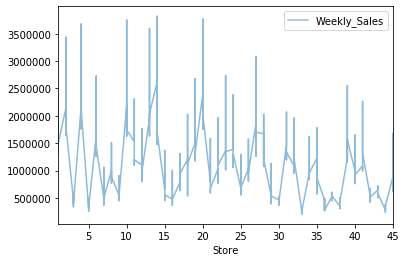

In [8]:
df_stores.plot(kind='line', x='Store',y='Weekly_Sales', alpha=1.5,fig=(4,5))
#sns.barplot(y=df_stores["Store"],x=df_stores["Weekly_Sales"])

#### Which store has maximum standard deviation 

In [9]:
df_std_sales = df_stores.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)

In [10]:
df_std_sales.head()

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

###### Store 14 has maximum standard deviation

#### Find out the coefficient of mean to standard deviation

In [11]:
df_var_sales = df_stores.groupby('Store')['Weekly_Sales'].var().sort_values(ascending=False)

In [12]:
df_var_sales.head()

Store
14    1.008507e+11
10    9.136235e+10
20    7.612112e+10
4     7.086321e+10
13    7.049396e+10
Name: Weekly_Sales, dtype: float64

#### Which store/s has good quarterly growth rate in Q3’2012

In [13]:
df_stores.Date = pd.to_datetime(df_stores.Date)

In [14]:
df_pivot = df_stores.pivot_table(index='Store', columns='Date', values='Weekly_Sales', aggfunc='sum')

In [15]:
df_pivot.head()

Date,2010-01-10,2010-02-04,2010-02-07,2010-02-19,2010-02-26,2010-03-09,2010-03-12,2010-03-19,2010-03-26,2010-04-06,...,2012-09-03,2012-09-14,2012-09-21,2012-09-28,2012-10-02,2012-10-08,2012-10-19,2012-10-26,2012-11-05,2012-12-10
Store,,,,,,,,,,,,,,,,,,,,,
1,1453329.50,1594968.28,1492418.14,1611968.17,1409727.59,1540163.53,1548033.78,1472515.79,1404429.92,1615524.71,...,1675431.16,1517428.87,1506126.06,1437059.26,1802477.43,1592409.97,1508068.77,1493659.74,1611096.05,1573072.81
2,1827440.43,2066187.72,2003940.64,2124451.54,1865097.27,1904608.09,2015781.27,1946070.88,1750197.81,2102539.93,...,1937628.26,1814806.63,1829415.67,1746470.56,2103322.68,1866719.96,1847990.41,1834458.35,1917520.99,1900745.13
3,358784.10,423294.40,381151.72,421642.19,407204.86,366473.97,476420.77,375328.59,359949.27,396968.80,...,445162.05,407589.16,414392.09,389813.02,473292.47,391811.60,424513.08,405432.70,431985.36,410804.39
4,1842821.02,1979247.12,1881337.21,2049860.26,1925728.84,1935857.58,2102530.17,1897429.36,1762539.30,1903290.58,...,2202450.81,2117854.60,2119438.53,2027620.23,2374660.64,2193367.69,2097266.85,2149594.46,2127661.17,2133026.07
5,283178.12,331406.00,305993.27,303447.57,270281.63,323798.00,344490.88,281706.41,273282.97,337825.89,...,347295.60,299800.67,307306.76,310141.68,349239.88,306759.70,313358.15,319550.77,333870.52,325345.41


In [16]:
df_Q = (df_pivot.groupby(pd.PeriodIndex(df_pivot.columns, freq='Q'), axis=1).apply(lambda x: x.sum(axis=1)/x.shape[1]))

In [17]:
df_Q.columns

PeriodIndex(['2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2',
             '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'],
            dtype='period[Q-DEC]', name='Date', freq='Q-DEC')

In [18]:
df_Q32012 =df_Q['2012Q3']

In [19]:
df_Q32012.sort_values(ascending=False).head()

Store
4     2.137677e+06
20    2.055495e+06
13    2.026666e+06
2     1.866406e+06
10    1.764113e+06
Name: 2012Q3, dtype: float64

###### Top 5 Stores in 2012-Q3 are 4,20,13,2,10

#### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [20]:
df_hol_sales = df_stores.groupby(['Date','Holiday_Flag'])['Weekly_Sales'].mean().sort_values(ascending=True)

In [21]:
df_hol_sales.head()

Date        Holiday_Flag
2011-01-28  0               879996.733111
2012-01-27  0               885221.659333
2010-12-31  1               898500.422222
2011-01-21  0               903436.622889
2011-01-14  0               903859.512000
Name: Weekly_Sales, dtype: float64

In [24]:
#df['BrandName'] = df['BrandName'].replace(['ABC', 'AB'], 'A')
#df_holiday=df_stores['Date'].replace(['12-Feb-10', '11-Feb-11', '10-Feb-12', '8-Feb-13'],'SB')
#df_holiday=df_holiday['Date'].replace(['10-Sep-10', '9-Sep-11', '7-Sep-12', '6-Sep-13'],'LD')
#df_holiday=df_holiday['Date'].replace(['10-Sep-10', '9-Sep-11', '7-Sep-12', '6-Sep-13'],'LD')
#df['c2'] = np.where(df.c1 == 8,'X', df.c3)
#df['FirstName'][df.ID == 103] = "Matt"
#df_holiday= df_stores['Holiday_Flag'][df_stores.Date == '12-Feb-10']='SB'
#df_holiday= df_stores.copy()  .astype(str)  .astype(int)
#df_holiday['Holiday_Flag']=np.where((df_holiday['Date']==datetime(2010, 2, 12)) | (df_holiday['Date']==datetime(2011, 2, 11)) | 
 #                      (df_holiday['Date']==datetime(2012, 2, 10)) | (df_holiday['Date']==datetime(2013, 2, 8)),'1','SB')
df_holiday= df_stores[
            (df_stores['Date'].dt.strftime('%Y-%m-%d') == '2010-02-10') |
            (df_stores['Date'].dt.strftime('%Y-%m-%d') == '2011-02-11') |
            (df_stores['Date'].dt.strftime('%Y-%m-%d') == '2012-02-10') |
            (df_stores['Date'].dt.strftime('%Y-%m-%d') == '2013-02-08') | 
            (df_stores['Holiday_Flag']=='SB')
          ]
                    
                      



C:\Users\win10\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [28]:
df_holiday.head()
#df_stores.head()
#df_holiday.Holiday_Flag.value_counts()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [68]:
df_stores['Date'].dt.strftime('%Y-%m-%d')

0       2010-05-02
1       2010-12-02
2       2010-02-19
3       2010-02-26
4       2010-05-03
           ...    
6430    2012-09-28
6431    2012-05-10
6432    2012-12-10
6433    2012-10-19
6434    2012-10-26
Name: Date, Length: 6435, dtype: object

In [ ]:
df_stores.Date = pd.to_datetime(df_stores.Date)
df_stores.set_index('Date', inplace=True)
df_stores.resample('QS').sum()

In [ ]:
print(df[
   (df['Date-Joined'] > '2010-01-01') &
   (df['Date-Joined'] < '2012-02-01') &
   (df['Contract-Type'] == '1 Year Membership') |
   (df['Contract-Type'] == '4 Month Membership')
  ])